In [1]:
from base import BasePlotter, np, plt
# import importlib
# import oneD
# importlib.reload(oneD)
from oneD import Solver1D, FluxMap1D
# Apply rcParams configuration
BasePlotter.configure_rc_params()

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap1D/"

# Generalising Step Concentrations

Concentration profile described by a step function with varying starting positions ($x_0$) and lenghts ($l$), with the restriction $x_0 + l \leq L$.

$$
c_{\text{step}}(x; x_0,l) = 
\begin{cases} 
\frac{1}{l},    & x \in [x_0, x_0 + l], \\
0               & x \in [0, L] \cup [x_0, x_0 + l]
\end{cases}
$$

In [2]:
def step_generator(x0, l):
    'Define the inner step function that takes x as parameter'
    def c_step(x):
        'Determine the condition based on x0 and l'
        cond = (x >= x0) & (x <= x0 + l)
        # Return 1/l where the condition is True, otherwise return 0
        return np.where(cond, 1 / l, 0)
    return c_step

In [3]:
syst_params = {
    'L' : 1.0,
    'T_ratio': None,        # Timescales Ratio (Tc/Td)
    'nx':  1000,            # nx: Weird triangles appear if it's too low
    'n_x0' : 500, 'n_l' : 500
}
SOLVE_SYSTEM = False

### 1. Comparable Timescales ($\tau_{\langle c \rangle} / \tau_d \sim 1$) 📄

alpha = 2.0


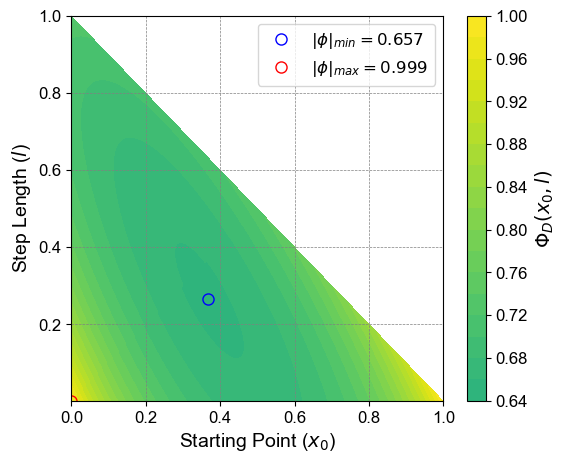

In [7]:
syst_params['T_ratio'] = 1.0

FM_comp = FluxMap1D(syst_params, step_generator)
if SOLVE_SYSTEM:
    FM_comp.solve(n_jobs=-1)
    FM_comp.save_data('c_step(x)_T_ratio=1.0')
else:
    FM_comp.load_data('c_step(x)_T_ratio=1.0')
FM_comp.plot(set_extremes=True, set_transition=False)
FM_comp.save(figures_path, 'c_step(x)_T_ratio=1.0')
print(f'alpha = {FM_comp.alpha}')

### 2. Absorption Domination ($\tau_{\langle c \rangle} / \tau_d \ll 1$) 📄

alpha = 20.0


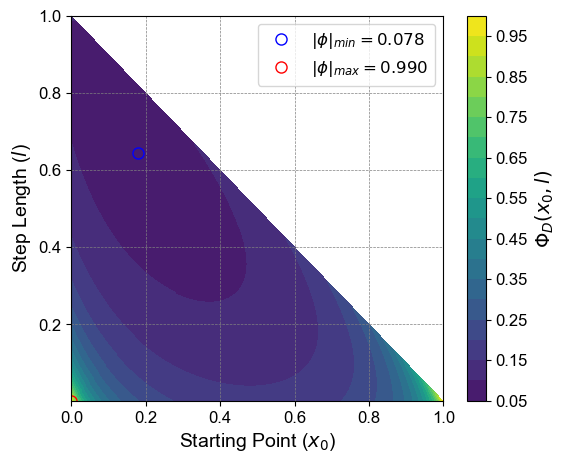

In [6]:
syst_params['T_ratio'] = 0.1
FM_abs = FluxMap1D(syst_params, step_generator)
if SOLVE_SYSTEM:
    FM_abs.solve(n_jobs=-1)
    FM_abs.save_data('c_step(x)_T_ratio=0.1')
else:
    FM_abs.load_data('c_step(x)_T_ratio=0.1')
FM_abs.plot(set_extremes=True, set_transition=False)
FM_abs.save(figures_path, 'c_step(x)_T_ratio=0.1')
print(f'alpha = {FM_abs.alpha}')

### 3. Diffusion Domination ($\tau_{\langle c \rangle} / \tau_d \gg 1$) 📄

alpha = 0.2


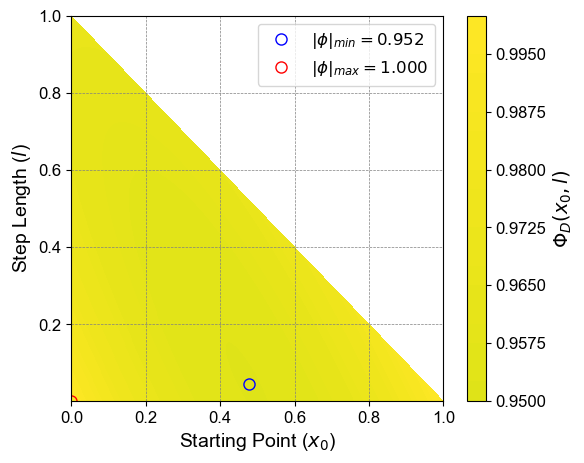

In [6]:
syst_params['T_ratio'] = 10
FM_diff = FluxMap1D(syst_params, step_generator)
if SOLVE_SYSTEM:
    FM_diff.solve(n_jobs=-1)
    FM_diff.save_data('c_step(x)_T_ratio=10')
else:
    FM_diff.load_data('c_step(x)_T_ratio=10')
FM_diff.plot(set_extremes=True)
FM_diff.save(figures_path, 'c_step(x)_T_ratio=10')
print(f'alpha = {FM_diff.alpha}')

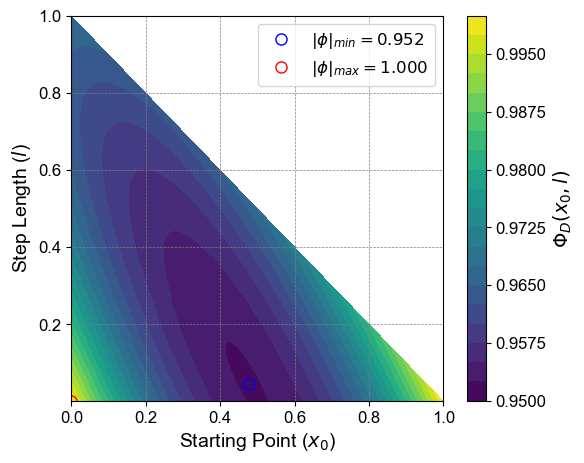

In [7]:
FM_diff.plot(set_extremes=True, flux_range=False)
FM_diff.save(figures_path, 'c_step(x)_T_ratio=10_no_range')

___
### 4. Set of Step Concentration 📄❓

In [8]:
# base = BasePlotter()
# base.configure_rc_params()

# FM = FluxMap1D(syst_params, None)

# # def compute_flux_profile(syst_params, step_generator):
# 'Compute the flux profile for a given set of system parameters and step generator'
# L = syst_params['L']
# nx = syst_params['nx']
# n_l = syst_params['n_l']
# n_x0 = syst_params['n_x0']

# # Generate the x0 and l values
# x0_values = np.linspace(0, L, n_x0)
# l_values = np.linspace(0, L, n_l)
# # Initialize the array to store the profile values
# c_dist_values = np.zeros((nx, n_x0, n_l))

# # Create the figure for the bacteria distribution and flux
# base.fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# cmap = plt.get_cmap('viridis')

# for i, x0 in enumerate(x0_values):
#     for j, l in enumerate(l_values):
#         # Create the step function for the current x0 and l
#         c_step = step_generator(x0, l)
#         # Store the computed profile value
#         # Ensure the output shape matches the expected shape
#         c_dist_values[:, i, j] = c_step(FM.x_values)

# c_dist_values = c_dist_values.reshape(nx, n_x0*n_l)

# # Plot the bacteria distribution
# for i in range(n_x0*n_l):
#     colour = cmap(i / (n_x0*n_l))
#     ax.plot(FM.x_values, c_dist_values[:, i], color=colour, alpha=0.5)
# ax.set_xlabel('x')
# ax.set_ylabel('c(x)')
# ax.set_title('Step Bacterial Distribution')

# # compute_flux_profile(syst_params, step_generator)

